In [1]:
### Probable Outcomes of Bitcoin Price Trajectory over the next 252 trading days 

In [48]:
import pandas as pd
import numpy as np
import datetime 
from pandas_datareader import data as pdr

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import hvplot.pandas
%matplotlib inline
import seaborn as sns
from yahoofinancials import YahooFinancials

In [50]:
#Five year data 
start_sp = datetime.datetime(2014, 10, 1)
end_sp = datetime.datetime(2019, 10, 1)

#create dataframes

#Bitcoin 
BTC_df_five = pdr.get_data_yahoo('BTC-USD', start_sp, end_sp)
BTC_df = pdr.get_data_yahoo('BTC-USD', start_sp, end_sp)
BTC_df['Close'][-1]

8393.0419921875

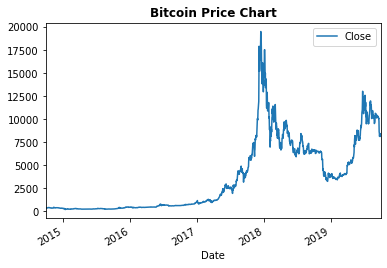

In [52]:
BTC_df_five.plot(y="Close")
plt.title("Bitcoin Price Chart", weight="bold");

In [53]:
#Drop extra columns to be left with closing price 
BTC_df_five.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
BTC_df_five.head()

,Close
Date,
2014-09-30,383.614990
2014-10-01,375.071991
2014-10-02,359.511993
2014-10-03,328.865997
2014-10-04,320.510010


In [54]:
# calculate daily returns of BTC
BTC_df_five_returns = BTC_df_five.pct_change()
BTC_df_five_returns.head()

,Close
Date,
2014-09-30,NaN
2014-10-01,-0.022270
2014-10-02,-0.041485
2014-10-03,-0.085243
2014-10-04,-0.025408


In [56]:
BTC_df_five_returns = BTC_df_five_returns.rename(columns = {"Close": "BTC Daily Returns"}) 
BTC_df_five_returns = BTC_df_five_returns.fillna(0, inplace=False)
BTC_df_five_returns.head()

,BTC Daily Returns
Date,
2014-09-30,0.000000
2014-10-01,-0.022270
2014-10-02,-0.041485
2014-10-03,-0.085243
2014-10-04,-0.025408


In [57]:
# calculate the mean of daily returns for BTC
avg_BTC_df_five_returns = BTC_df_five_returns.mean()['BTC Daily Returns']
avg_BTC_df_five_returns

# calculate the standard deviation of daily returns for BTC

std_BTC_df_five_returns = BTC_df_five_returns.std()['BTC Daily Returns']
std_BTC_df_five_returns

0.038881852889831384

In [58]:
# Sets the number of simulations, trading days, and gets the last closing price of BTC from DataFrame
num_simulations = 1000
num_trading_days = 252
BTC_last_price = BTC_df['Close'][-1]

# Initializes an empty DataFrame to hold simulated prices for each simulation
simulated_BTC_price_df = pd.DataFrame()

# Run the simulations of projecting Bitcoin prices for the next trading year, `n` times
for n in range(num_simulations):

    # Initializes the simulated prices list with the last closing price of BTC
    simulated_BTC_prices = [BTC_last_price]
    
    # Simulates the returns for 252 days
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_price = simulated_BTC_prices[-1] * (1 + np.random.normal(avg_BTC_df_five_returns, std_BTC_df_five_returns))
        # Append the simulated price to the list
        simulated_BTC_prices.append(simulated_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_BTC_price_df[f"Simulation {n+1}"] = pd.Series(simulated_BTC_prices)

# Print head of DataFrame
simulated_BTC_price_df.tail()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
248,12572.442232,6989.032528,4070.158573,11831.918740,10059.555534,25309.210240,5246.792497,7411.791178,7435.578920,8067.947896,...,14981.404357,23219.632861,17870.887842,19384.564964,13648.893768,20645.886257,8458.764385,16014.667400,18521.205554,9314.989241
249,11487.995934,6520.053634,4035.085623,12383.713891,9870.705553,23148.169826,5254.412179,7605.308957,7235.692289,8061.487191,...,14978.015610,23185.379666,19043.806001,20626.095868,13082.802129,21045.995938,8135.598338,15309.109360,18497.379087,9597.210217
250,11726.208481,6525.580275,3952.619882,13454.841076,10213.420981,23077.865116,5261.322774,7869.780736,7229.765865,8577.862076,...,15373.642059,23320.622366,18748.395364,21838.786696,13129.909984,21924.553684,8134.744949,15249.771822,17719.089896,9604.467307
251,11219.974717,6842.404861,4189.556442,12859.285728,10440.192741,21886.946280,5234.017152,8569.784078,7271.236461,8308.368545,...,14836.259536,23907.160754,19826.379839,22562.677290,12821.366843,21325.934682,8679.497989,14996.635259,18526.468774,9461.930979
252,11184.621485,7085.682745,3899.056965,12961.715679,10690.356345,20896.205687,5205.967461,8525.884966,7437.116372,8108.305530,...,14420.223816,23227.348176,20273.445367,22505.868062,12616.549767,21372.331801,8721.653739,15588.597887,18171.750492,9483.871216


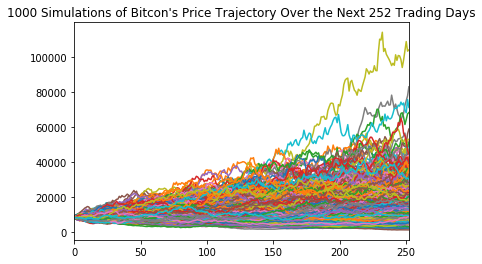

In [59]:
# the trajectory of BTC stock based on a x trading day simulation
plot_title = f"{n+1} Simulations of Bitcon's Price Trajectory Over the Next 252 Trading Days"
simulated_BTC_price_df.plot(legend=None, title=plot_title)

In [60]:
# a list of the last price for each simulation for Bitcoin
BTC_simulated_ending_prices = simulated_BTC_price_df.iloc[-1, :]
BTC_simulated_ending_prices.head()

Simulation 1    11184.621485
Simulation 2     7085.682745
Simulation 3     3899.056965
Simulation 4    12961.715679
Simulation 5    10690.356345
Name: 252, dtype: float64

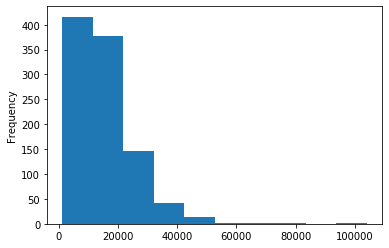

In [61]:
# a frequency distribution of simulated ending prices
BTC_simulated_ending_prices.plot(kind='hist')

In [62]:
#the 95% confidence interval for simulated ending prices
confidence_interval = BTC_simulated_ending_prices.quantile(q=[0.025, 0.975])
confidence_interval

0.025     4139.068916
0.975    40247.733411
Name: 252, dtype: float64

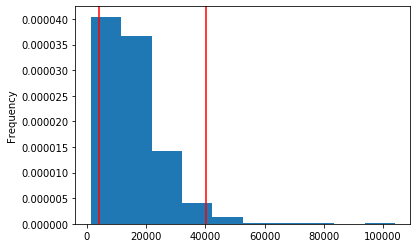

In [63]:
# a probability distribution histogram of simulated ending prices with markings for a 95% confidence interval
plt.figure();
BTC_simulated_ending_prices.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [64]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - BTC_last_price) / BTC_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - BTC_last_price) / BTC_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in Bitcoin"
      f" over the next 252 trading days will end within in the range of"
      f" ${ending_investment_lower_bound} and ${ending_investment_upper_bound}")

There is a 95% chance that an initial investment of $10,000 in Bitcoin over the next 252 trading days will end within in the range of $4931.547965158548 and $47953.690030769874
